# Dynamics HW6 by Aspen Morgan

In [1]:
!pip install cartopy
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 18.5 MB/s eta 0:00:00


## (a) Download datasets

In [2]:
tnu = xr.open_dataset('/content/drive/MyDrive/Colab Notebooks/Atmos_Dynamics/data_0.nc')
ozone = xr.open_dataset('/content/drive/MyDrive/Colab Notebooks/Atmos_Dynamics/data_1.nc')

## (b) Prepare the data


In [3]:
# convert the mass content of ozone to Dobson units
Odb2019 = ozone.sel(date=20190901).tco3 * 46698
Odb2022 = ozone.sel(date=20220901).tco3 * 46698

In [13]:
Odb2019

<xarray.DataArray 'tco3' (latitude: 721, longitude: 1440)> Size: 4MB
array([[281.17563, 281.17563, 281.17563, ..., 281.17563, 281.17563,
        281.17563],
       [281.04202, 281.04202, 281.04202, ..., 281.03647, 281.03647,
        281.03647],
       [280.83606, 280.83606, 280.83606, ..., 280.8305 , 280.8305 ,
        280.83606],
       ...,
       [227.07156, 227.07156, 227.07713, ..., 227.05487, 227.06042,
        227.066  ],
       [227.85649, 227.85649, 227.86206, ..., 227.84535, 227.85092,
        227.85092],
       [228.69151, 228.69151, 228.69151, ..., 228.69151, 228.69151,
        228.69151]], dtype=float32)
Coordinates:
    number     int64 8B ...
    date       int64 8B 20190901
  * latitude   (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    expver     <U4 16B ...

In [4]:
# Decompose the zonal wind into the full field
U2019 = tnu.sel(date=20190901).sel(pressure_level=100).u
U2022 = tnu.sel(date=20220901).sel(pressure_level=100).u

In [5]:
# Decompose the zonal wind into the mean by latitude
U2019_mean_buf = np.ones((len(U2019.latitude), len(U2019.longitude)))
for i in range(len(U2019.latitude)):
  mean = U2019.sel(latitude=U2019.latitude[i]).mean(dim='longitude')
  U2019_mean_buf[i, :] = mean
U2019_mean = xr.DataArray(U2019_mean_buf, coords=[U2019.latitude, U2019.longitude], dims=['latitude', 'longitude'])

U2022_mean_buf = np.ones((len(U2022.latitude), len(U2022.longitude)))
for i in range(len(U2022.latitude)):
  mean = U2022.sel(latitude=U2022.latitude[i]).mean(dim='longitude')
  U2022_mean_buf[i, :] = mean
U2022_mean = xr.DataArray(U2022_mean_buf, coords=[U2022.latitude, U2022.longitude], dims=['latitude', 'longitude'])

In [6]:
# Decompose the zonal wind into the eddy part
U2019_eddy = U2019 - U2019_mean
U2022_eddy = U2022 - U2022_mean

In [7]:
# Decompose the temp into the mean by latitude
T2019_mean_buf = np.ones((len(tnu.latitude), len(tnu.longitude)))
for i in range(len(tnu.latitude)):
  mean = tnu.sel(date=20190901).sel(pressure_level=100).sel(latitude=tnu.latitude[i]).t.mean(dim='longitude')
  T2019_mean_buf[i, :] = mean
T2019_mean = xr.DataArray(T2019_mean_buf, coords=[tnu.latitude, tnu.longitude], dims=['latitude', 'longitude'])

T2022_mean_buf = np.ones((len(tnu.latitude), len(tnu.longitude)))
for i in range(len(tnu.latitude)):
  mean = tnu.sel(date=20220901).sel(pressure_level=100).sel(latitude=tnu.latitude[i]).t.mean(dim='longitude')
  T2022_mean_buf[i, :] = mean
T2022_mean = xr.DataArray(T2022_mean_buf, coords=[tnu.latitude, tnu.longitude], dims=['latitude', 'longitude'])

## (c) Plot

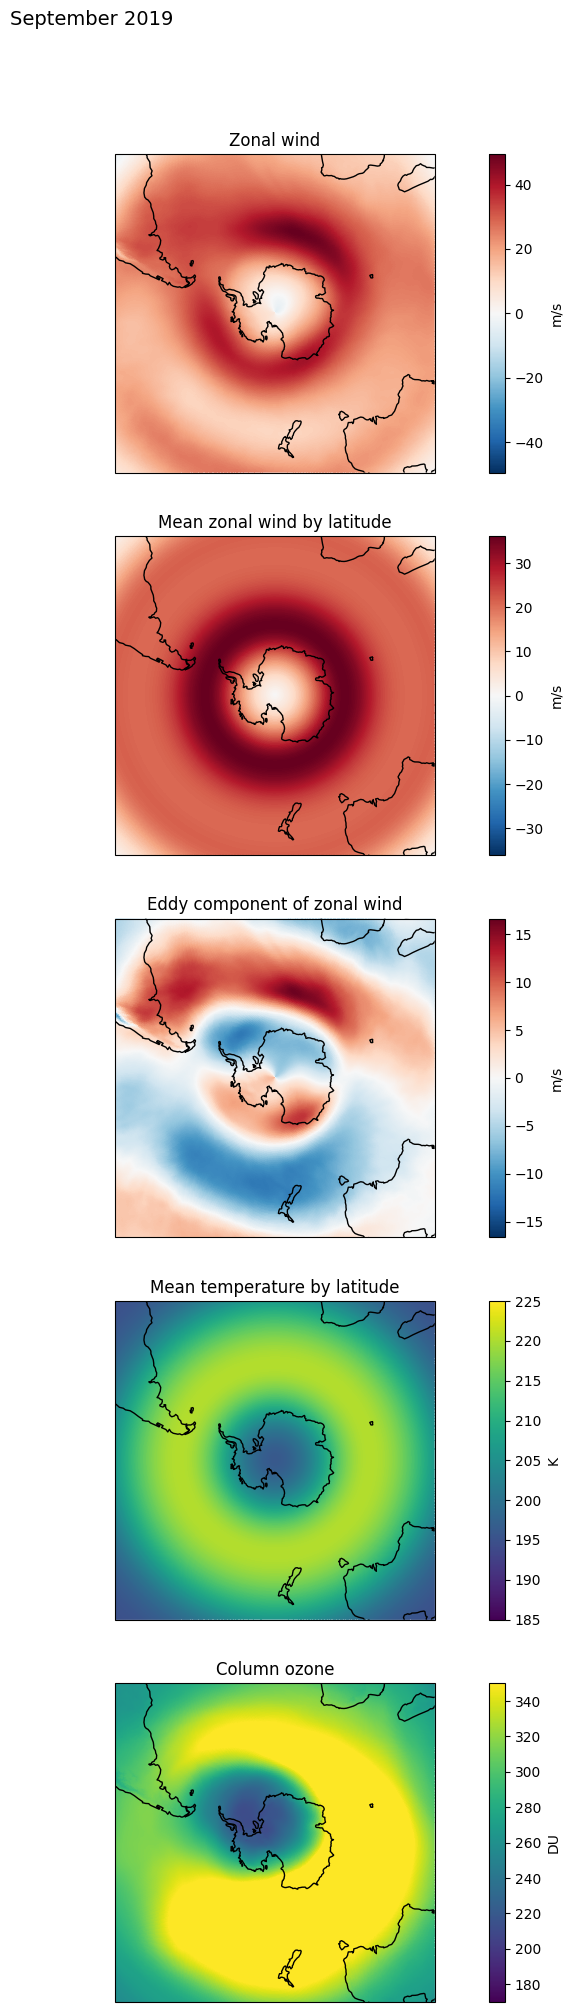

In [9]:
# 2019
fig, ax = plt.subplots(5, 1, figsize=(14, 24), subplot_kw=dict(projection=ccrs.SouthPolarStereo()))

im = U2019.plot(ax=ax[0], add_colorbar=False, transform=ccrs.PlateCarree())
ax[0].set_title('Zonal wind');
ax[0].coastlines()
ax[0].set_extent([-180, 180, -90, -30], crs=ccrs.PlateCarree())
cb = plt.colorbar(im, ax=ax[0], orientation='vertical')
cb.set_label('m/s')

im2 = U2019_mean.plot(ax=ax[1], add_colorbar=False, transform=ccrs.PlateCarree())
ax[1].set_title('Mean zonal wind by latitude');
ax[1].coastlines()
ax[1].set_extent([-180, 180, -90, -30], crs=ccrs.PlateCarree())
cb2 = plt.colorbar(im2, ax=ax[1], orientation='vertical')
cb2.set_label('m/s')

im3 = U2019_eddy.plot(ax=ax[2], add_colorbar=False, transform=ccrs.PlateCarree())
ax[2].set_title('Eddy component of zonal wind');
ax[2].coastlines()
ax[2].set_extent([-180, 180, -90, -30], crs=ccrs.PlateCarree())
cb3 = plt.colorbar(im3, ax=ax[2], orientation='vertical')
cb3.set_label('m/s')

im4 = T2019_mean.plot(ax=ax[3], add_colorbar=False, transform=ccrs.PlateCarree(),
                      vmin=185, vmax=225)
ax[3].set_title('Mean temperature by latitude');
ax[3].coastlines()
ax[3].set_extent([-180, 180, -90, -30], crs=ccrs.PlateCarree())
cb4 = plt.colorbar(im4, ax=ax[3], orientation='vertical')
cb4.set_label('K')

im5 = Odb2019.plot(ax=ax[4], add_colorbar=False, transform=ccrs.PlateCarree(),
                   vmin=170, vmax=350)
ax[4].set_title('Column ozone');
ax[4].coastlines()
ax[4].set_extent([-180, 180, -90, -30], crs=ccrs.PlateCarree())
cb5 = plt.colorbar(im5, ax=ax[4], orientation='vertical')
cb5.set_label('DU')

fig.suptitle('September 2019', y=0.94, size=14);

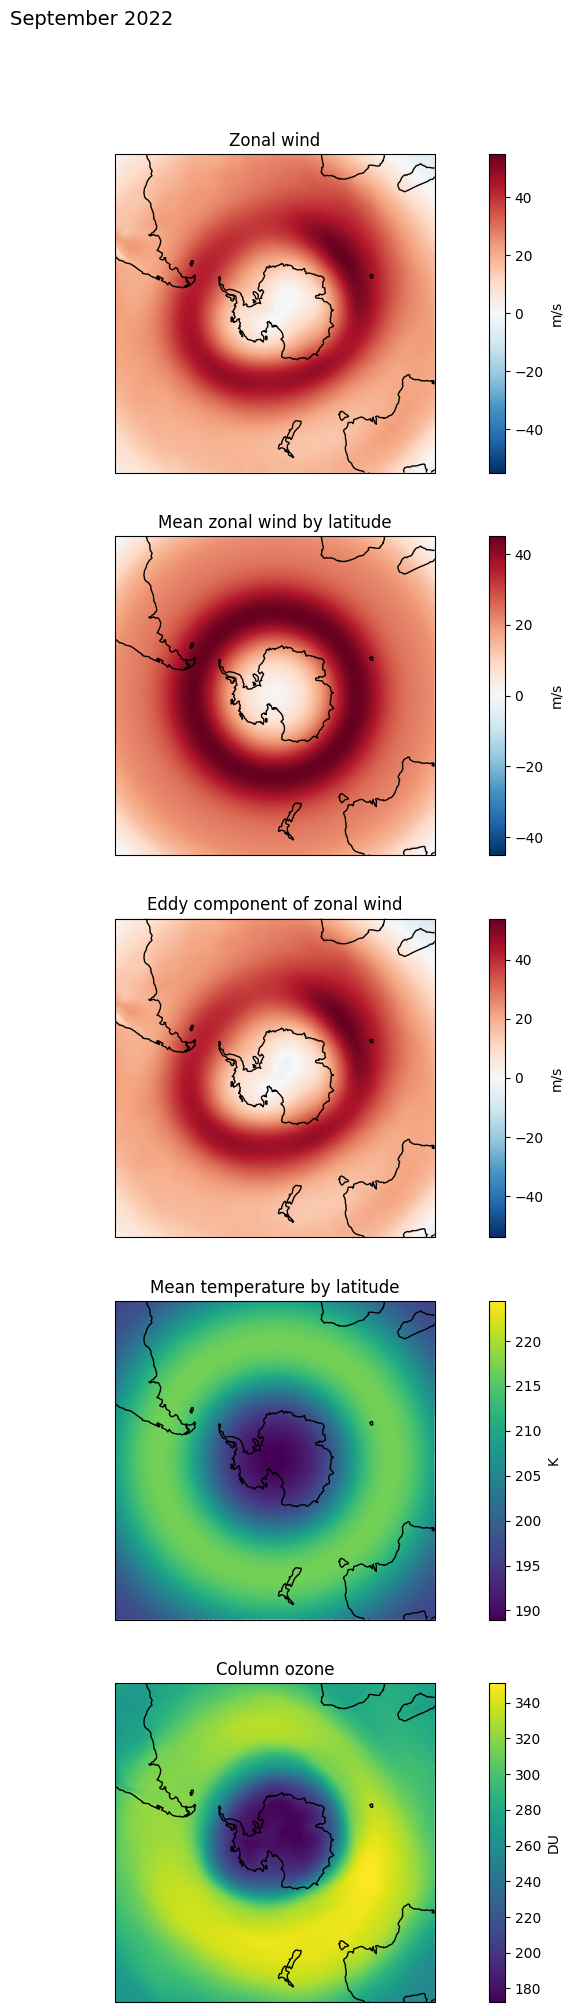

In [24]:
# 2022
fig, ax = plt.subplots(5, 1, figsize=(14, 24), subplot_kw=dict(projection=ccrs.SouthPolarStereo()))

im = U2022.plot(ax=ax[0], add_colorbar=False, transform=ccrs.PlateCarree())
ax[0].set_title('Zonal wind');
ax[0].coastlines()
ax[0].set_extent([-180, 180, -90, -30], crs=ccrs.PlateCarree())
cb = plt.colorbar(im, ax=ax[0], orientation='vertical')
cb.set_label('m/s')


im1 = U2022_mean.plot(ax=ax[1], add_colorbar=False, transform=ccrs.PlateCarree())
ax[1].set_title('Mean zonal wind by latitude');
ax[1].coastlines()
ax[1].set_extent([-180, 180, -90, -30], crs=ccrs.PlateCarree())
cb1 = plt.colorbar(im1, ax=ax[1], orientation='vertical')
cb1.set_label('m/s')


im2 = U2022_eddy.plot(ax=ax[2], add_colorbar=False, transform=ccrs.PlateCarree())
ax[2].set_title('Eddy component of zonal wind');
ax[2].coastlines()
ax[2].set_extent([-180, 180, -90, -30], crs=ccrs.PlateCarree())
cb2 = plt.colorbar(im2, ax=ax[2], orientation='vertical')
cb2.set_label('m/s')


im3 = T2022_mean.plot(ax=ax[3], add_colorbar=False, transform=ccrs.PlateCarree())
ax[3].set_title('Mean temperature by latitude');
ax[3].coastlines()
ax[3].set_extent([-180, 180, -90, -30], crs=ccrs.PlateCarree())
cb3 = plt.colorbar(im3, ax=ax[3], orientation='vertical')
cb3.set_label('K')


im4 = Odb2022.plot(ax=ax[4], add_colorbar=False, transform=ccrs.PlateCarree())
ax[4].set_title('Column ozone');
ax[4].coastlines()
ax[4].set_extent([-180, 180, -90, -30], crs=ccrs.PlateCarree())
cb4 = plt.colorbar(im4, ax=ax[4], orientation='vertical')
cb4.set_label('DU')


fig.suptitle('September 2022', y=0.94, size=14);